# Credit Card Fraud Detection- anomaly detection

## Objective: 

To build an Anamoly detection to identify fraudulent transactions.Also to show examples of Outliers, Change in Events and Drifts in the dataset

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [74]:
# Load the dataset
df = pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Fraud Detection/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Anomaly Detection

Anomaly detection is the task of identifying transactions that deviate from the norm. Here we are using a clustering algorithm, such as Local Outlier Factor (LOF), to identify points that are in low-density regions of the data.

In [45]:

# Separate the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    284315
           1       0.00      0.96      0.00       492

    accuracy                           0.00    284807
   macro avg       0.00      0.32      0.00    284807
weighted avg       0.00      0.00      0.00    284807



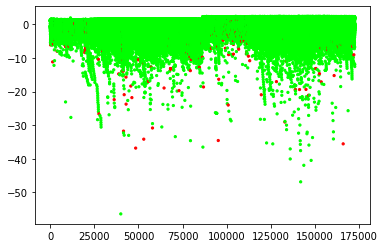

In [46]:
# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Define LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001, novelty=True)

# Fit the model and make predictions
lof.fit(X)
y_pred = lof.predict(X)

# Evaluate the model
print(classification_report(y, y_pred))

# Visualize the results
colors = np.array(['#ff0000', '#00ff00'])
plt.scatter(X[:, 0], X[:, 1], color=colors[(y_pred + 1) // 2], s=5)
plt.show()

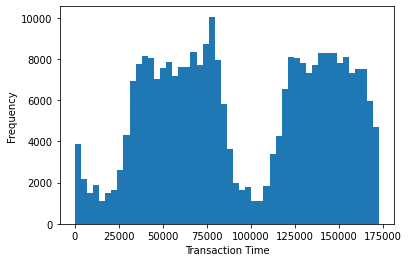

In [75]:
plt.hist(df['Time'], bins=50)
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()

# Outliers

In [56]:
df.loc[100, 'V1'] = 10
df.loc[200, 'V2'] = -20


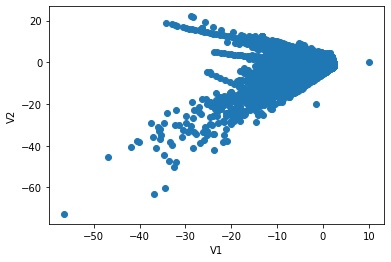

In [57]:
plt.scatter(df['V1'], df['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

We can see two outliers in the above plot.

# Change in Events

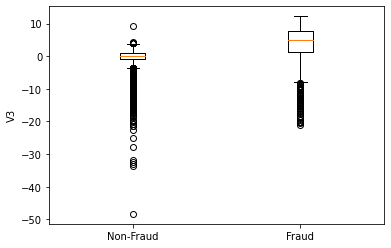

In [58]:
df.loc[df['Class'] == 1, 'V3'] = df.loc[df['Class'] == 1, 'V3'] + 10

plt.boxplot([df.loc[df['Class'] == 0, 'V3'], df.loc[df['Class'] == 1, 'V3']])
plt.xticks([1, 2], ['Non-Fraud', 'Fraud'])
plt.ylabel('V3')
plt.show()


The boxplot shows that the distribution of V3 values for fraudulent transactions has shifted upward by 10 units.

# Drifts

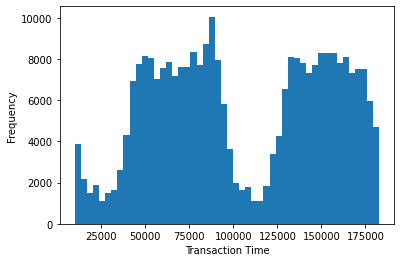

In [76]:
df['Time'] = df['Time'] + 10000

plt.hist(df['Time'], bins=50)
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of transaction times has shifted by 10,000 units to the right.